In [2]:
#import required library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading data
X_train=pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
Y_train=pd.read_csv('Y_train.csv')
Y_test=pd.read_csv('Y_test.csv')

In [4]:
#Calculating “Average profit per customer” for reaching out to all the customers in training data
print("The number of customers to be reached out to are:",len(Y_train))
print("Number of responders are:",Y_train["Y"].value_counts()[1],"\n")
print("Cost associate for reaching out to customers: $",len(Y_train)*10)
print("Revenue: $",Y_train["Y"].value_counts()[1]*50)
print("Profit (revnue - cost):$",Y_train["Y"].value_counts()[1]*50-len(Y_train)*10)

#without any model,company would be at a loss 

The number of customers to be reached out to are: 28831
Number of responders are: 3252 

Cost associate for reaching out to customers: $ 288310
Revenue: $ 162600
Profit (revnue - cost):$ -125710


Logistic Regression

In [6]:
from sklearn.metrics import confusion_matrix
def cost_funciton(Y_Actual, Y_Predicted, cost_per_individual,
                  revenue_per_individual, low_threshold, high_threshold):
    cost_function_output = pd.DataFrame()
    for threshold in np.arange(low_threshold, high_threshold, 0.01):
        confusion_out = confusion_matrix(Y_Actual, np.where(Y_Predicted>threshold,1,0))
        target_populaion=round((confusion_out[1][1]+confusion_out[0][1])/len(Y_Actual),4)
        responders_in_target_populaiton=round(confusion_out[1][1]/(len(Y_Actual)),4)
        cost=(confusion_out[1][1]+confusion_out[0][1])*cost_per_individual
        revenue=confusion_out[1][1]*revenue_per_individual
        profit=revenue-cost
        ROI=round(profit/cost*100,0)
        cost_function_output=cost_function_output.append([[threshold, 
                                                           responders_in_target_populaiton*100, 
                                                           target_populaion*100, 
                                                           revenue, 
                                                           cost,  
                                                           profit, 
                                                           ROI]])
    return cost_function_output

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict_proba(X_train)[:,1] 
cost_function_output=cost_funciton(Y_train, Y_pred , 10, 50, 0.25, 0.75)
my_columns = ["Probability of event happening",  "% Responders_in_target_populaiton", 
              "% Target_populaion", "Revenue", "Cost",  "Profit","ROI"]
cost_function_output.columns = my_columns
cost_function_output

,Probability of event happening,% Responders_in_target_populaiton,% Target_populaion,Revenue,Cost,Profit,ROI
0,0.25,5.72,12.83,82400,36990,45410,123.0
0,0.26,5.42,11.92,78100,34380,43720,127.0
0,0.27,5.29,11.58,76200,33400,42800,128.0
0,0.28,5.06,11.04,73000,31830,41170,129.0
0,0.29,4.67,9.86,67300,28420,38880,137.0
0,0.30,4.66,9.78,67200,28200,39000,138.0
0,0.31,4.51,9.45,64950,27250,37700,138.0
0,0.32,4.41,9.17,63600,26450,37150,140.0
0,0.33,3.94,7.81,56750,22530,34220,152.0
0,0.34,3.63,7.05,52400,20330,32070,158.0


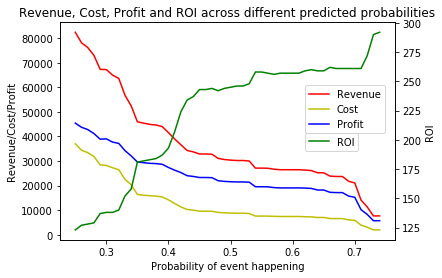

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(cost_function_output["Probability of event happening"],cost_function_output["Revenue"], color='r')
ax1.plot(cost_function_output["Probability of event happening"],cost_function_output["Cost"],color='y')
ax1.plot(cost_function_output["Probability of event happening"],cost_function_output["Profit"],color='b')
ax1.set_xlabel('Probability of event happening')
ax1.set_ylabel('Revenue/Cost/Profit')
#plt.legend()
plt.legend(loc='center', bbox_to_anchor=(0.85, 0.6))

ax2 = ax1.twinx()
ax2.plot(cost_function_output["Probability of event happening"],cost_function_output["ROI"],color='g')
ax2.set_ylabel('ROI')
plt.legend(loc='center', bbox_to_anchor=(0.81, 0.45))

plt.title("Revenue, Cost, Profit and ROI across different predicted probabilities")
plt.show()


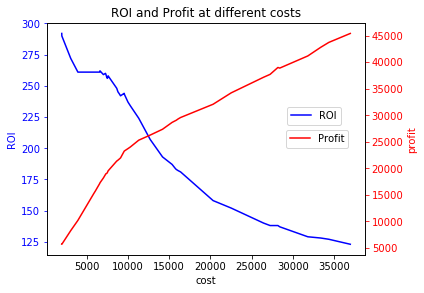

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(cost_function_output["Cost"],cost_function_output["ROI"],color='b')
ax1.set_xlabel('cost')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('ROI', color='b')
ax1.tick_params('y', colors='b')
plt.legend(loc='center', bbox_to_anchor=(0.84, 0.6))

ax2 = ax1.twinx()
ax2.plot(cost_function_output["Cost"],cost_function_output["Profit"], color='r')
ax2.set_ylabel('profit', color='r')
ax2.tick_params('y', colors='r')
plt.legend(loc='center', bbox_to_anchor=(0.85, 0.5))

fig.tight_layout()
plt.title("ROI and Profit at different costs")
plt.show()

#as cost increases ROI decreases and profit increases
#if max profit, 
#if max ROI
#sweet spot

In [10]:
from sklearn.metrics import confusion_matrix
def model_eval(confusion_matrix):
    print("accracy:",round((confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[1][0]+confusion_matrix[0][1]),2))
    print("specificity:",round((confusion_matrix[0][0])/(confusion_matrix[0][0]+confusion_matrix[0][1]),2))
    print("sensitivity:",round((confusion_matrix[1][1])/(confusion_matrix[1][0]+confusion_matrix[1][1]),2))
    return 

In [11]:
cutoff=0.42
confusion_matrix_train = confusion_matrix(Y_train, 
                                         np.where(logreg.predict_proba(X_train)[:,1]>cutoff,1,0))
confusion_matrix_test = confusion_matrix(Y_test, 
                                         np.where(logreg.predict_proba(X_test)[:,1]>cutoff,1,0))
print("train data results:\n")
model_eval(confusion_matrix_train)
print("\n")

print("test data results:\n")
model_eval(confusion_matrix_test)

train data results:

accracy: 0.9
specificity: 0.98
sensitivity: 0.23


test data results:

accracy: 0.9
specificity: 0.98
sensitivity: 0.22
